/Users/debryas/Desktop/PhD_work/HNL_tau_analysis/hnl-coffea-analysis/plot_helpers.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  run_lumi = np.array(run_lumi).astype(float)


Showing pt_tau1_tte
Scaling of background and signal wrt Data_Tau_2018 with lumi 59832.475347


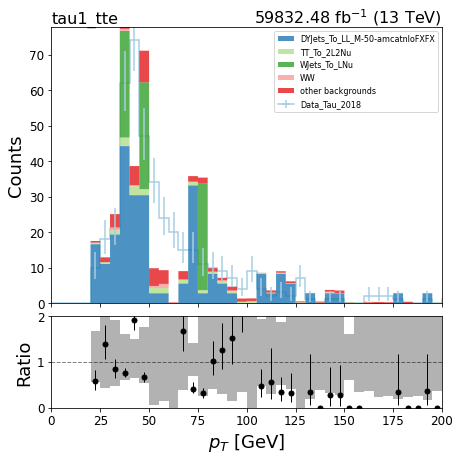

   
Showing pt_tau2_tte
Scaling of background and signal wrt Data_Tau_2018 with lumi 59832.475347


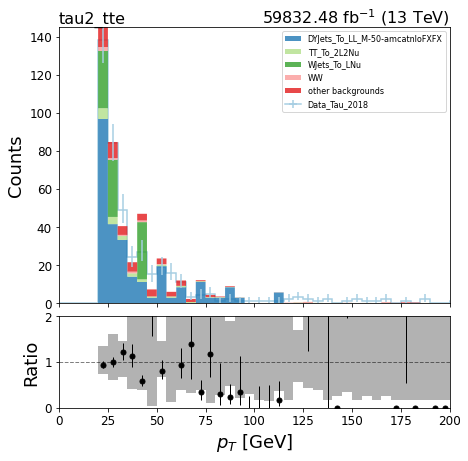

   
Showing pt_e1_tte
Scaling of background and signal wrt Data_Tau_2018 with lumi 59832.475347


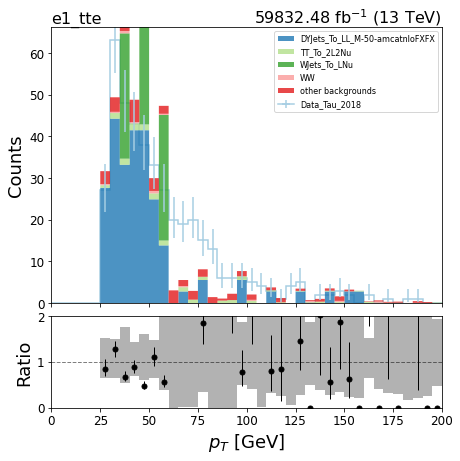

   
Showing pt_tau1_ttm
Scaling of background and signal wrt Data_SingleMuon_2018 with lumi 59832.475347


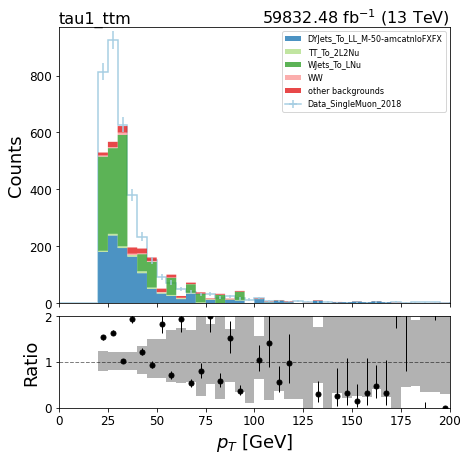

   
Showing pt_tau2_ttm
Scaling of background and signal wrt Data_SingleMuon_2018 with lumi 59832.475347


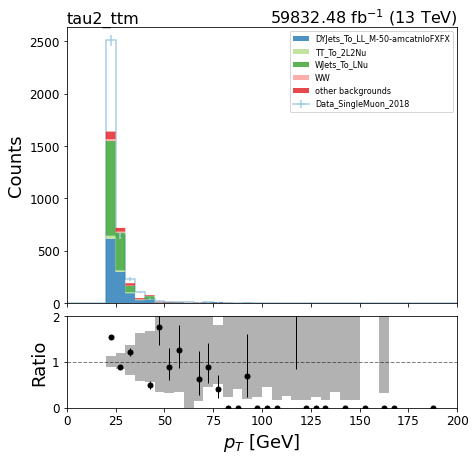

   
Showing pt_mu1_ttm
Scaling of background and signal wrt Data_SingleMuon_2018 with lumi 59832.475347


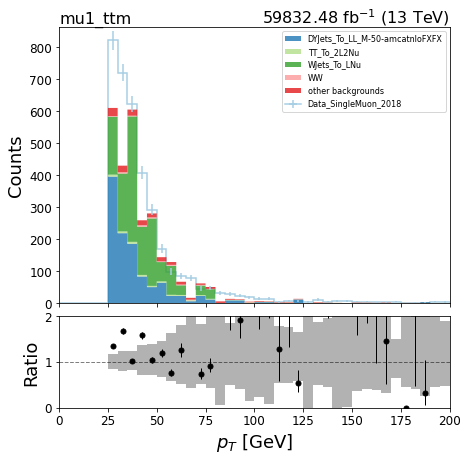

   
Showing pt_tau1_tee
Scaling of background and signal wrt Data_EGamma_2018 with lumi 27992.983335


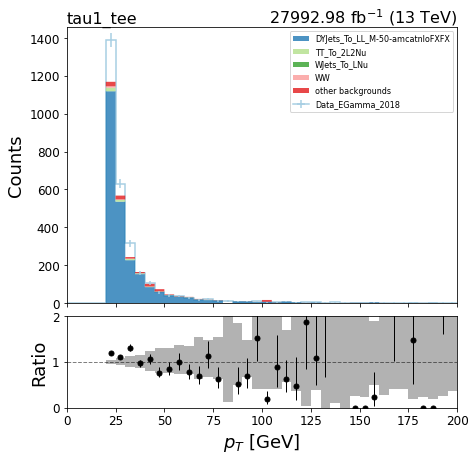

   
Showing pt_e1_tee
Scaling of background and signal wrt Data_EGamma_2018 with lumi 27992.983335


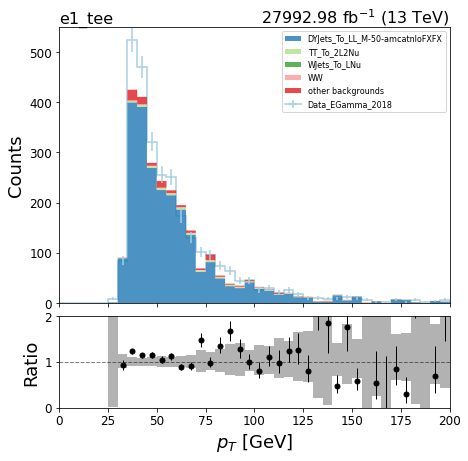

   
Showing pt_e2_tee
Scaling of background and signal wrt Data_EGamma_2018 with lumi 27992.983335


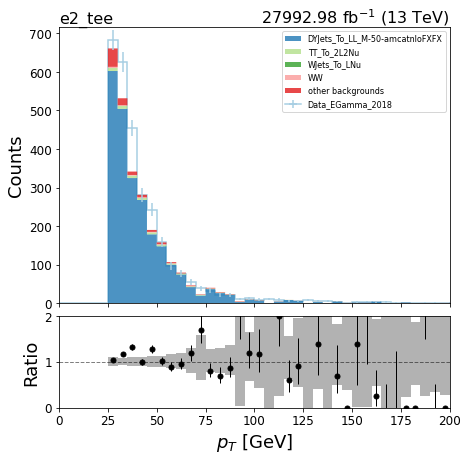

   
Showing pt_tau1_tmm
Scaling of background and signal wrt Data_SingleMuon_2018 with lumi 59832.475347


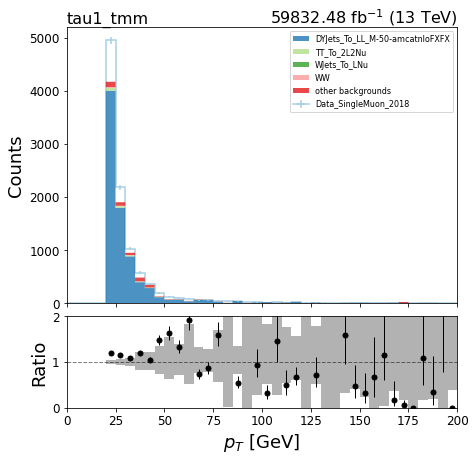

   
Showing pt_mu1_tmm
Scaling of background and signal wrt Data_SingleMuon_2018 with lumi 59832.475347


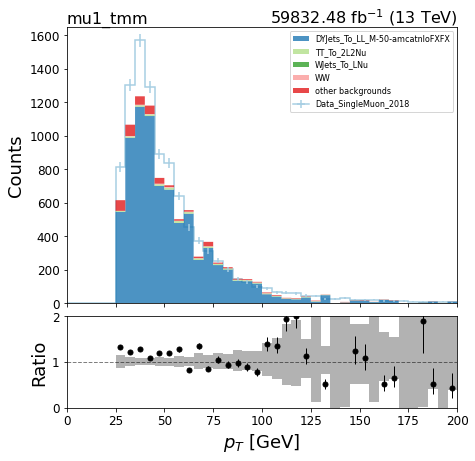

   
Showing pt_mu2_tmm
Scaling of background and signal wrt Data_SingleMuon_2018 with lumi 59832.475347


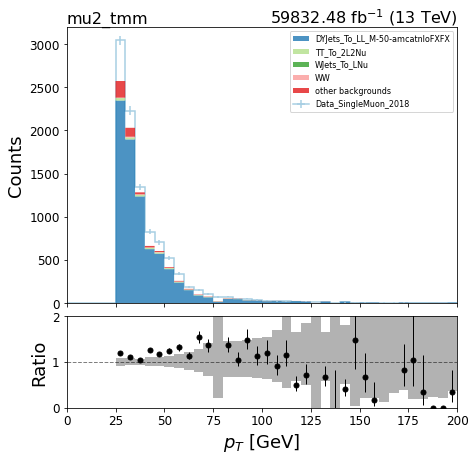

   
Showing pt_tau1_tem_SS
Scaling of background and signal wrt Data_SingleMuon_2018 with lumi 59832.475347


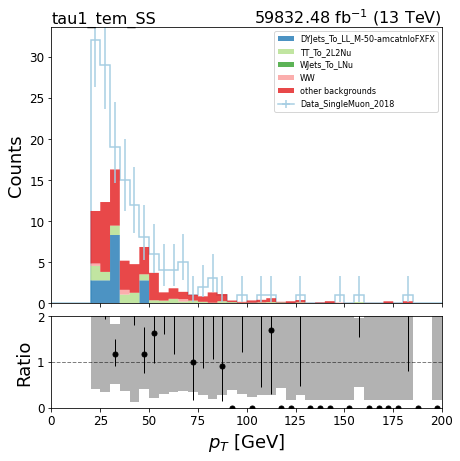

   
Showing pt_mu1_tem_SS
Scaling of background and signal wrt Data_SingleMuon_2018 with lumi 59832.475347


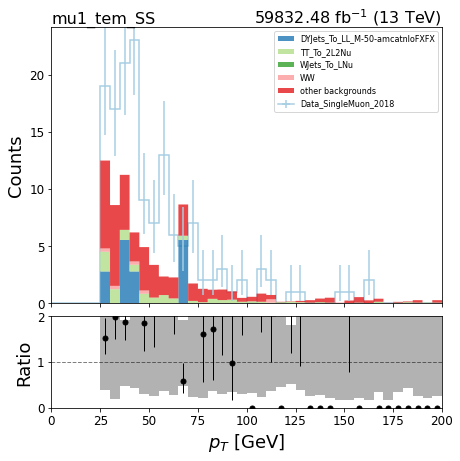

   
Showing pt_e1_tem_SS
Scaling of background and signal wrt Data_SingleMuon_2018 with lumi 59832.475347


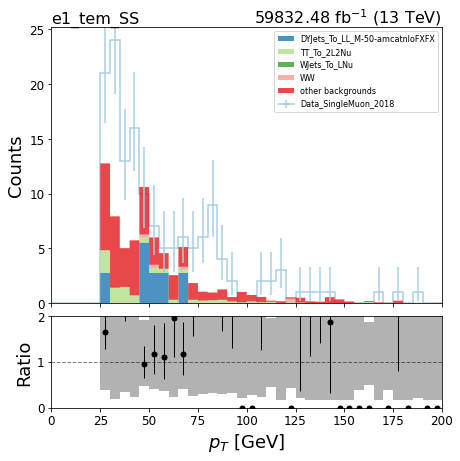

   
Showing pt_tau1_tem_OS
Scaling of background and signal wrt Data_SingleMuon_2018 with lumi 59832.475347


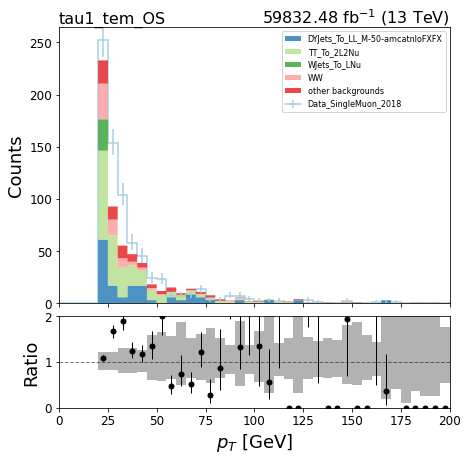

   
Showing pt_mu1_tem_OS
Scaling of background and signal wrt Data_SingleMuon_2018 with lumi 59832.475347


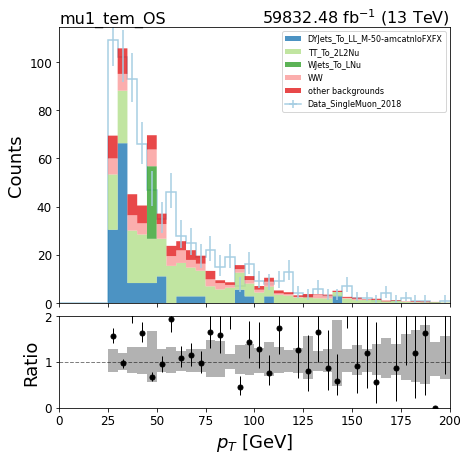

   
Showing pt_e1_tem_OS
Scaling of background and signal wrt Data_SingleMuon_2018 with lumi 59832.475347


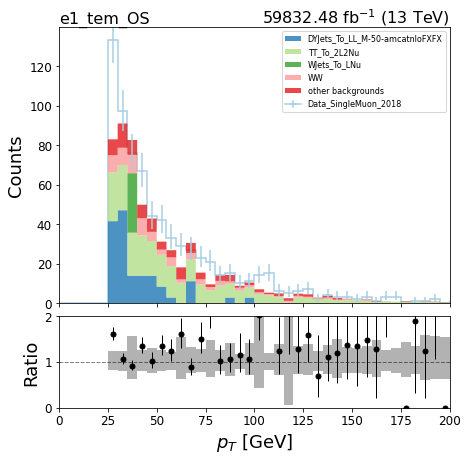

In [1]:
#!/usr/bin/env python
from coffea.nanoevents import NanoAODSchema
from coffea import hist
NanoAODSchema.warn_missing_crossrefs = True

from HNLAnalysis import HNLAnalysis
from samples import signal_samples, Data_samples, MCbackground_samples, plot_scale
from luminosity.xsecs import xsecs
from plot_helpers import compute_lumi, pt_ratio_plot

from cycler import cycler
import pickle
import matplotlib.pyplot as plt
import numpy as np
import warnings
import os

tag = 'Sanity_Check'
save_dir = '/Users/debryas/Desktop/PhD_work/HNL_tau_analysis/hnl-coffea-analysis/figures/' #directory where to store figures

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

#load results
with open(f'results/result_{tag}.pkl', 'rb') as f:
    result = pickle.load(f)
with open (f'results/counter_{tag}.pkl', 'rb') as f:
    event_counter = pickle.load(f)

#compute the luminosity of each data samples
luminosity = {}
for element in Data_samples:
    luminosity[element] = compute_lumi(element)

#compute the integrated luminosity of data samples for area A, B, C and D
lumi_EGamma_2018 = 0
lumi_SingleMuon_2018 = 0
lumi_Tau_2018 = 0
for element in Data_samples:
    if element[:-1] == 'Data_EGamma_2018':
        lumi_EGamma_2018 += luminosity[element]
    if element[:-1] == 'Data_SingleMuon_2018':
        lumi_SingleMuon_2018 += luminosity[element]
    if element[:-1] == 'Data_Tau_2018':
        lumi_Tau_2018 += luminosity[element]

# store all the samples 
Data_samples_merged = {}
for s in Data_samples:
    Data_samples_merged[s[0:-1]] = Data_samples[s]
samples = {**signal_samples, **Data_samples_merged, **MCbackground_samples}

#list of background, hnl and data to be plot
main_background = [
    'DYJets_To_LL_M-50-amcatnloFXFX',
    'TT_To_2L2Nu',
    'WJets_To_LNu',
    'WW']

other_background = [
    'DYJets_To_LL_M-10to50',
    'EWK_WMinus2Jets_W_To_LNu_M-50',
    'EWK_WPlus2Jets_W_To_LNu_M-50',
    'EWK_Z2Jets_Z_To_LL_M-50',
    'ST_t-channel_antitop_4f_InclusiveDecays',
    'ST_t-channel_top_4f_InclusiveDecays',
    'ST_tW_antitop_5f_inclusiveDecays',
    'ST_tW_top_5f_inclusiveDecays',
    'TT_To_Hadronic',
    'TT_To_SemiLeptonic',
    'TTWJets_To_LNu',
    'TTWW',
    'TTWZ',
    'TTZ_To_LLNuNu_M-10',
    'TTZZ',
    'WZ',
    'ZZ',
    'WWW_4F',
    'WWZ_4F',
    'WZZ',
    'ZZZ']

hnl = ['HNL100','HNL300','HNL600','HNL900']

data = ['Data_EGamma_2018','Data_SingleMuon_2018','Data_Tau_2018']

#channel that you want to study
plot_channel = ['tte','ttm','_SS','_OS','tee','tmm']

#sample that need to be scaled
scale_samples = main_background + other_background + hnl

In [ ]:
#sumary tab xsec
print(f'| {"Backgrounds":<43}', end='')
print(f'| {"cross-section   ":<15}', end='')
print(f'| {"total sumw      |":<5}', end='\n')

print(u'\u2500' * 81)
for name, cs in list(xsecs.items()):
    print(f'| {name:<43}', end='')
    print(f'| {cs:<15} ', end='')
    temp = str(round(event_counter['sumw'][name],3))
    print(f'| {temp:<15} |', end='\n')

    print(u'\u2500' * 81)

In [ ]:
#Pt plot data vs background

for v in HNLAnalysis.get_var_axis_pairs():
    try:
        var = v[0]
        if (var[0:2] in 'pt') and (var[-3:] in plot_channel):
            if (len(result[var].values()) == 0):
                #print(var, 'is empty')
                continue

            print('Showing', var)

            #scaling 
            if ('ttm' in var) or ('tmm' in var) or ('_SS' in var)or ('_OS' in var):
                data_name='Data_SingleMuon_2018'
                lumi = lumi_SingleMuon_2018
            if ('tte' in var):
                data_name='Data_Tau_2018'
                lumi = lumi_Tau_2018
            if 'tee' in var:
                data_name= 'Data_EGamma_2018'
                #PB with Data_EGamma_2018: Data_EGamma_2018D removed so luminosity change
                lumi = lumi_EGamma_2018

            print('Scaling of background and signal wrt '+ data_name + ' with lumi '+str(lumi))
            scales = {s:plot_scale[s]*lumi*xsecs[s]/event_counter['sumw'][s] for s in scale_samples}
            result[var].scale(scales, axis='ds')

            # make a nice ratio plot
            data_hist = result[var][data_name]

            BCK_histo = result[var][main_background]

            cumu_other_bck = np.zeros(300)
            for bck in other_background[0:]:
                if result[var][bck].values() == {}:
                    pass
                else:
                    cumu_other_bck = cumu_other_bck + list(result[var][bck].values().values())[0] #value at each bin

            # we create the pt histogram of all the other background and fill it with ones evrywhere, weighted by the value at each bin of the other backgrounds
            BCK_histo.fill(ds="other backgrounds", pt=np.arange(0., 1500, 1500/300), weight=cumu_other_bck)

            pt_ratio_plot(data_hist,BCK_histo,lumi, var, save_dir)

            print('   ')
            warnings.filterwarnings("default")
    except AssertionError:
        pass

Showing comb_mass_taul1_tte
plot scale of hnl samples: for now we scale each hnl samples by half the max of data sample otherwise we see nothing
scaling plot for HNL100 12596.362538621532
scaling plot for HNL300 50847.52624047157
scaling plot for HNL600 824897.6018377779
scaling plot for HNL900 4974886.878536489
Scaling of background and signal wrt Data_Tau_2018 with lumi 59832.475347


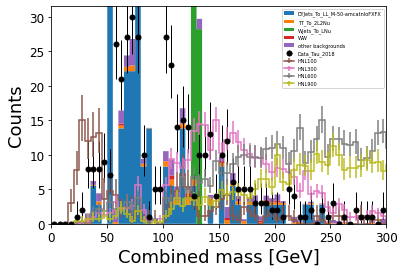

   
Showing comb_mass_taul1_ttm
plot scale of hnl samples: for now we scale each hnl samples by half the max of data sample otherwise we see nothing
scaling plot for HNL100 59482.82309904613
scaling plot for HNL300 520503.70947235415
scaling plot for HNL600 7494150.36336278
scaling plot for HNL900 56589338.24335256
Scaling of background and signal wrt Data_SingleMuon_2018 with lumi 59832.475347


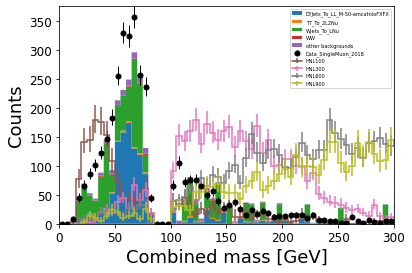

In [2]:
#combined mass histograms between OS tau (or leading in case t1 t2 have SS) and and lepton in ttl channels

for v in HNLAnalysis.get_var_axis_pairs():
    try:
        var = v[0]
        if (var[0:15] in 'comb_mass_taul1') and (var[-3:] in plot_channel):

            if (len(result[var].values()) == 0):
                #print(var, 'is empty')
                continue
            
            print('Showing', var)
            
            #scaling 
            if ('ttm' in var) or ('tem' in var) or ('tmm' in var):
                data_name='Data_SingleMuon_2018'
                lumi = lumi_SingleMuon_2018
            if ('tte' in var) or ('ttt' in var):
                data_name='Data_Tau_2018'
                lumi = lumi_Tau_2018
            if 'tee' in var:
                data_name= 'Data_EGamma_2018'
                #PB with Data_EGamma_2018: Data_EGamma_2018D removed so luminosity change
                lumi = lumi_EGamma_2018

            print('plot scale of hnl samples: for now we scale each hnl samples by half the max of data sample otherwise we see nothing')
            max_data = np.max(list(result[var][data_name].values().values())[0])
            for hnl_sample in hnl:
                plot_scale[hnl_sample] = max_data/(2*np.max(list(result[var][hnl_sample].values().values())[0])*lumi*xsecs[hnl_sample]/event_counter['sumw'][hnl_sample])
                print('scaling plot for ' + hnl_sample, max_data/(2*np.max(list(result[var][hnl_sample].values().values())[0])*lumi*xsecs[hnl_sample]/event_counter['sumw'][hnl_sample]))

            print('Scaling of background and signal wrt '+ data_name + ' with lumi '+str(lumi))
            scales = {s:plot_scale[s]*lumi*xsecs[s]/event_counter['sumw'][s] for s in scale_samples}
            result[var].scale(scales, axis='ds')

            # make a nice ratio plot
            data_hist = result[var][data_name]

            BCK_histo = result[var][main_background]

            cumu_other_bck = np.zeros(300)
            for bck in other_background[0:]:
                if result[var][bck].values() == {}:
                    pass
                else:
                    cumu_other_bck = cumu_other_bck + list(result[var][bck].values().values())[0] #value at each bin

            BCK_histo.fill(ds="other backgrounds", mc=np.arange(0., 1500, 1500/300), weight=cumu_other_bck)
            
            # plotting data
            ax = hist.plot1d(data_hist, clear=True, error_opts={'marker': '.',
                                                                'markersize': 10.,
                                                                'color': 'k',
                                                                'elinewidth': 1})

            warnings.filterwarnings("ignore")

            # plotting background
            ax = hist.plot1d(BCK_histo, stack=True, clear=False)

            warnings.filterwarnings("ignore")

            # plotting signal
            ax = hist.plot1d(result[var][hnl], clear=False)

            plt.xlim(0,300)
            #plt.ylim(0,9000)
            plt.legend(prop={'size': 5})
            plt.savefig(save_dir+var[-3:]+'/'+var+'.pdf',format='pdf')
            plt.show()

            print('   ')
            warnings.filterwarnings("default")

    except AssertionError:
        pass

Showing met_tte
plot scale of hnl samples: for now we scale each hnl samples by half the max of data sample otherwise we see nothing
scaling plot for HNL100 23923.32420125795
scaling plot for HNL300 73415.21284075452
scaling plot for HNL600 857942.827143088
scaling plot for HNL900 4913182.855236812
Scaling of background and signal wrt Data_Tau_2018 with lumi 59832.475347


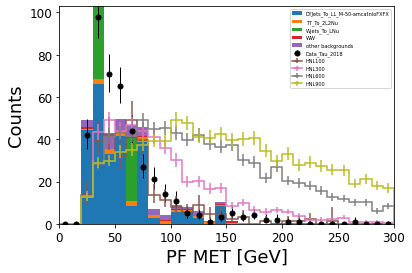

   
Showing met_ttm
plot scale of hnl samples: for now we scale each hnl samples by half the max of data sample otherwise we see nothing
scaling plot for HNL100 74839.49965076066
scaling plot for HNL300 409438.9041062809
scaling plot for HNL600 5672597.722323436
scaling plot for HNL900 37052542.89743322
Scaling of background and signal wrt Data_SingleMuon_2018 with lumi 59832.475347


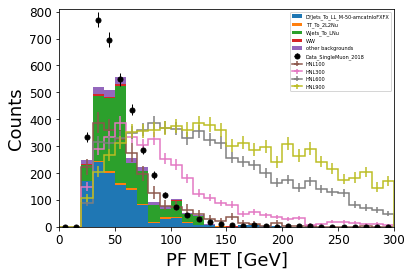

   
Showing met_tee
plot scale of hnl samples: for now we scale each hnl samples by half the max of data sample otherwise we see nothing
scaling plot for HNL100 254682.58947694412
scaling plot for HNL300 1963287.7067166457
scaling plot for HNL600 23212785.523582675
scaling plot for HNL900 142299532.91082832
Scaling of background and signal wrt Data_EGamma_2018 with lumi 27992.983335


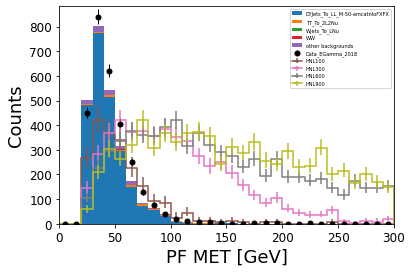

   
Showing met_tmm
plot scale of hnl samples: for now we scale each hnl samples by half the max of data sample otherwise we see nothing
scaling plot for HNL100 264053.0595380577
scaling plot for HNL300 2569230.8496917062
scaling plot for HNL600 35604299.03198899
scaling plot for HNL900 229583161.61849532
Scaling of background and signal wrt Data_SingleMuon_2018 with lumi 59832.475347


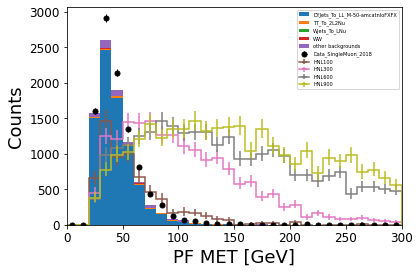

   
Showing met_tem_SS
plot scale of hnl samples: for now we scale each hnl samples by half the max of data sample otherwise we see nothing
scaling plot for HNL100 10496.968782184611
scaling plot for HNL300 53415.58312130346
scaling plot for HNL600 676782.6546633502
scaling plot for HNL900 4061622.620640902
Scaling of background and signal wrt Data_SingleMuon_2018 with lumi 59832.475347


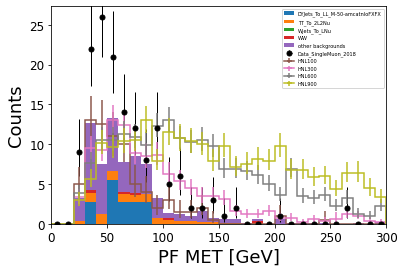

   
Showing met_tem_OS
plot scale of hnl samples: for now we scale each hnl samples by half the max of data sample otherwise we see nothing
scaling plot for HNL100 30145.14111806863
scaling plot for HNL300 87783.01254617056
scaling plot for HNL600 1109912.983048056
scaling plot for HNL900 6706884.532545488
Scaling of background and signal wrt Data_SingleMuon_2018 with lumi 59832.475347


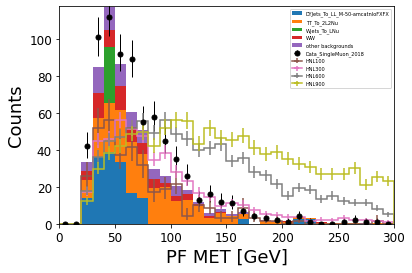

In [3]:
#plot met of channels

for v in HNLAnalysis.get_var_axis_pairs():
    try:
        var = v[0]
        if (var[0:3] in 'met') and (var[-3:] in plot_channel):

            if (len(result[var].values()) == 0):
                #print(var, 'is empty')
                continue
            
            print('Showing', var)
            
            #scaling 
            if ('ttm' in var) or ('tem' in var) or ('tmm' in var):
                data_name='Data_SingleMuon_2018'
                lumi = lumi_SingleMuon_2018
            if ('tte' in var) or ('ttt' in var):
                data_name='Data_Tau_2018'
                lumi = lumi_Tau_2018
            if 'tee' in var:
                data_name= 'Data_EGamma_2018'
                #PB with Data_EGamma_2018: Data_EGamma_2018D removed so luminosity change
                lumi = lumi_EGamma_2018

            print('plot scale of hnl samples: for now we scale each hnl samples by half the max of data sample otherwise we see nothing')
            max_data = np.max(list(result[var][data_name].values().values())[0])
            for hnl_sample in hnl:
                plot_scale[hnl_sample] = max_data/(2*np.max(list(result[var][hnl_sample].values().values())[0])*lumi*xsecs[hnl_sample]/event_counter['sumw'][hnl_sample])
                print('scaling plot for ' + hnl_sample, max_data/(2*np.max(list(result[var][hnl_sample].values().values())[0])*lumi*xsecs[hnl_sample]/event_counter['sumw'][hnl_sample]))

            print('Scaling of background and signal wrt '+ data_name + ' with lumi '+str(lumi))
            scales = {s:plot_scale[s]*lumi*xsecs[s]/event_counter['sumw'][s] for s in scale_samples}
            result[var].scale(scales, axis='ds')

            # make a nice ratio plot
            data_hist = result[var][data_name]

            BCK_histo = result[var][main_background]

            cumu_other_bck = np.zeros(30)
            for bck in other_background[0:]:
                if result[var][bck].values() == {}:
                    pass
                else:
                    cumu_other_bck = cumu_other_bck + list(result[var][bck].values().values())[0] #value at each bin

            BCK_histo.fill(ds="other backgrounds", met=np.arange(0., 300, 300/30), weight=cumu_other_bck)
            
            # plotting data
            ax = hist.plot1d(data_hist, clear=True, error_opts={'marker': '.',
                                                                'markersize': 10.,
                                                                'color': 'k',
                                                                'elinewidth': 1})

            warnings.filterwarnings("ignore")

            # plotting background
            ax = hist.plot1d(BCK_histo, stack=True, clear=False)

            warnings.filterwarnings("ignore")

            # plotting signal
            ax = hist.plot1d(result[var][hnl], clear=False)

            plt.xlim(0,300)
            #plt.ylim(0,9000)
            plt.legend(prop={'size': 5})
            plt.savefig(save_dir+var[-3:]+'/'+var+'.pdf',format='pdf')
            plt.show()

            print('   ')
            warnings.filterwarnings("default")

    except AssertionError:
        pass